# 目标检测和边界框


In [3]:
import torch as t
import torch.nn as nn
import sys
sys.path.append("../")

from pltutils import *

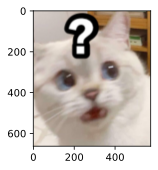

In [4]:
set_figsize()

img = plt.imread("../figures/cat.jpg")
plt.imshow(img)

In [5]:
# 使用边界框来描述对象的空间位置，边界框是矩形的，一个矩形需要两个点才能够决定。
# 另外一种表示方法是边界框中心的xy坐标和框的高度和宽度
def box_corner_to_center(boxes: t.Tensor):
    """从（左上，右下）转换到（中间，宽度，高度）"""
    x1,y1,x2,y2 = boxes[:,0],boxes[:,1],boxes[:,2],boxes[:,3]
    cx = (x1+x2)/2
    cy = (y1+y2)/2
    w = x2-x1
    h=y2-y1
    boxes = t.stack((cx,cy,w,h),dim=-1)
    return boxes


def box_center_to_corner(boxes:t.Tensor):
    """从（中间，宽度，高度）转换到（左上，右下）"""
    cx,cy,w,h = boxes[:,0],boxes[:,1],boxes[:,2],boxes[:,3]
    x1 =cx -0.5*w
    y1 = cy-0.5*h
    x2 = cx+0.5*w
    y2 = cy+0.5*h
    boxes = t.stack((x1,y1,x2,y2),dim=-1)
    return boxes


In [6]:
left_eye_box,right_eye_box = [104,301,255,399],[336,257,433,352]
boxes = t.tensor((left_eye_box,right_eye_box))
box_center_to_corner(box_corner_to_center(boxes))


tensor([[104., 301., 255., 399.],
        [336., 257., 433., 352.]])

In [8]:
def bbox_to_rect(bbox,color):
    # 将边界框(左上x,左上y,右下x,右下y)格式转换成matplotlib格式：
    # ((左上x,左上y),宽,高)
    return plt.Rectangle(
        xy=(bbox[0],bbox[1]),width = bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2
    )

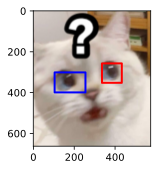

In [10]:
fig = plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(left_eye_box,"blue"))
fig.axes.add_patch(bbox_to_rect(right_eye_box,"red"))